# LoRA

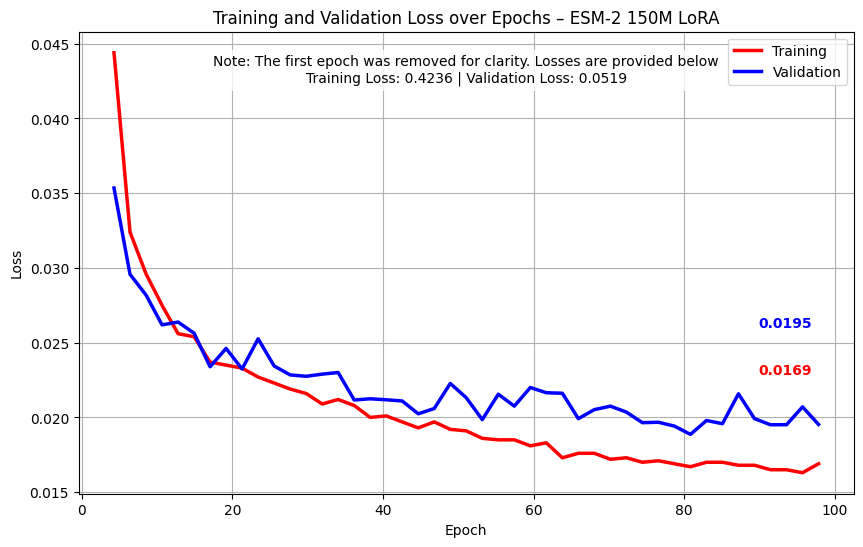

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("esm2_150m_lora.csv")


# Drop any rows with missing values in the relevant columns
df_clean = df.dropna(subset=["train/epoch", "esm2_150m_mutSeqs - train/loss", "esm2_150m_mutSeqs - eval/loss"])

# Re-extract the data from the cleaned DataFrame
epochs = df_clean["train/epoch"]
train_loss = df_clean["esm2_150m_mutSeqs - train/loss"]
eval_loss = df_clean["esm2_150m_mutSeqs - eval/loss"]

# Get the final values for annotation
last_epoch = epochs.iloc[-1]
last_train_loss = train_loss.iloc[-1]
last_eval_loss = eval_loss.iloc[-1]

plt.figure(figsize=(10, 6))
plt.plot(epochs[1:], train_loss[1:], label="Training", color="red", linewidth=2.5)
plt.plot(epochs[1:], eval_loss[1:], label="Validation", color="blue", linewidth=2.5)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs – ESM-2 150M LoRA")
plt.legend()
plt.grid(True)

# Offsets to position the text away from the final points
x_offset = 8  # horizontal offset in epoch units
y_offset = 0.006 # vertical offset in loss units

# Annotate the final training loss in red (shifted to the left)
plt.text(last_epoch - x_offset, last_train_loss + y_offset, f"{last_train_loss:.4f}",
         color="red", fontsize=10, weight="bold", bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))

# Annotate the final validation loss in blue (shifted to the right)
plt.text(last_epoch + -8, last_eval_loss + 0.0065, f"{last_eval_loss:.4f}",
         color="blue", fontsize=10, weight="bold", bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))

note_text = (f"Note: The first epoch was removed for clarity. Losses are provided below\n"
             f"Training Loss: {first_train_loss:.4f} | Validation Loss: {first_eval_loss:.4f}")
plt.text(0.5, 0.95, note_text, transform=plt.gca().transAxes, 
         ha="center", va="top", fontsize=10, bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))

plt.savefig("esm2150MLoRA_finetuningLosses.png")
plt.show()


In [6]:
pwd

'/home/sdowell/scratch/Thesis/Ch4Metrics/losses'

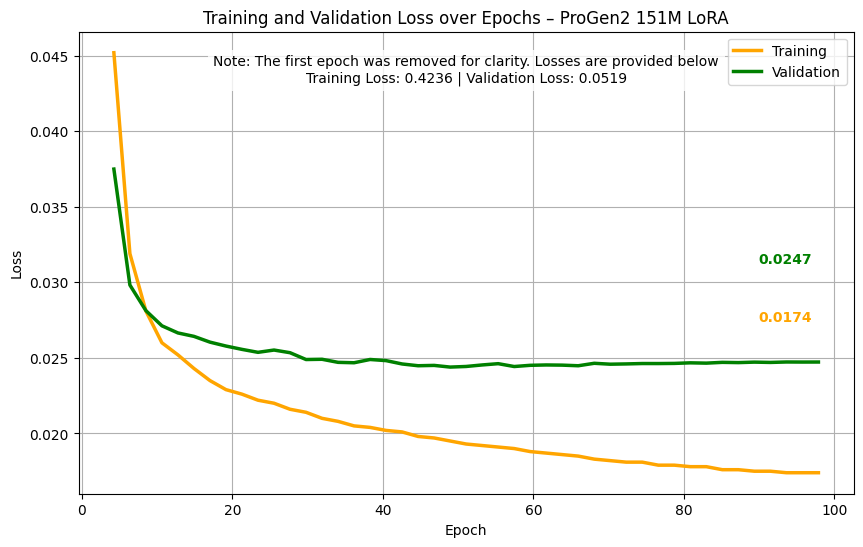

In [7]:
# Load the newly uploaded ProGen2 file
df_progen2_v2 = pd.read_csv("progen2_151m_lora.csv")

# Drop any rows with missing values in the relevant columns
df_clean = df_progen2_v2.dropna(subset=[
    "train/epoch", 
    "progen2_151M_mutSeqs - train/loss", 
    "progen2_151M_mutSeqs - eval/loss"
])

# Re-extract the data from the cleaned DataFrame
epochs = df_clean["train/epoch"]
train_loss = df_clean["progen2_151M_mutSeqs - train/loss"]
eval_loss = df_clean["progen2_151M_mutSeqs - eval/loss"]

# Get the first epoch losses for annotation
first_train_loss = train_loss.iloc[0]
first_eval_loss = eval_loss.iloc[0]

# Get the final values for annotation
last_epoch = epochs.iloc[-1]
last_train_loss = train_loss.iloc[-1]
last_eval_loss = eval_loss.iloc[-1]

# Now recreate the plot 1-to-1
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(epochs[1:], train_loss[1:], label="Training", color="orange", linewidth=2.5)
plt.plot(epochs[1:], eval_loss[1:], label="Validation", color="green", linewidth=2.5)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs – ProGen2 151M LoRA")
plt.legend()
plt.grid(True)

# Offsets to position the text away from the final points
x_offset = 8  # horizontal offset in epoch units
y_offset = 0.01 # vertical offset in loss units

# Annotate the final training loss in red (shifted to the left)
plt.text(last_epoch - x_offset, last_train_loss + y_offset, f"{last_train_loss:.4f}",
         color="orange", fontsize=10, weight="bold", bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))

# Annotate the final validation loss in blue (shifted to the right)
plt.text(last_epoch - x_offset, last_eval_loss + 0.0065, f"{last_eval_loss:.4f}",
         color="green", fontsize=10, weight="bold", bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))

# Note about skipped first epoch
note_text = (f"Note: The first epoch was removed for clarity. Losses are provided below\n"
             f"Training Loss: {first_train_loss:.4f} | Validation Loss: {first_eval_loss:.4f}")
plt.text(0.5, 0.95, note_text, transform=plt.gca().transAxes, 
         ha="center", va="top", fontsize=10, bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))

plt.savefig("progen2_151M_LoRA_finetuningLosses.png")
plt.show()


# Full finetuning

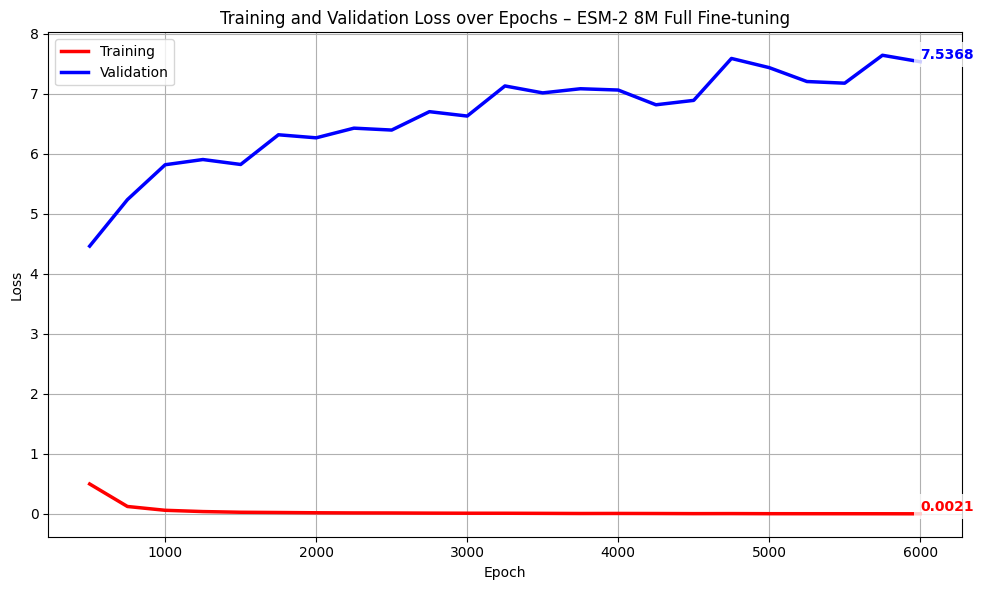

In [8]:
df = pd.read_csv("esm2_8m_fullfinetune.csv")

# Extract only the necessary columns
df_clean = df.dropna(subset=["train/epoch",
                             "ecoli_full_finetuning_esm2_8m - train/loss",
                             "ecoli_full_finetuning_esm2_8m - eval/loss"])

# Rename for easier plotting
df_clean = df_clean.rename(columns={
    "train/epoch": "epoch",
    "ecoli_full_finetuning_esm2_8m - train/loss": "train_loss",
    "ecoli_full_finetuning_esm2_8m - eval/loss": "eval_loss"
})

# Extract values
epochs = df_clean["epoch"]
train_loss = df_clean["train_loss"]
eval_loss = df_clean["eval_loss"]

# Final loss values
last_epoch = epochs.iloc[-1]
last_train_loss = train_loss.iloc[-1]
last_eval_loss = eval_loss.iloc[-1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label="Training", color="red", linewidth=2.5)
plt.plot(epochs, eval_loss, label="Validation", color="blue", linewidth=2.5)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs – ESM-2 8M Full Fine-tuning")
plt.legend()
plt.grid(True)

# Annotate last values
plt.text(last_epoch - 1, last_train_loss + 0.05, f"{last_train_loss:.4f}",
         color="red", fontsize=10, weight="bold", bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))
plt.text(last_epoch - 1, last_eval_loss + 0.05, f"{last_eval_loss:.4f}",
         color="blue", fontsize=10, weight="bold", bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))

# Save and display
plt.tight_layout()
plt.savefig("esm2_8m_finetuning_loss_plot_epochs.png")
plt.show()


# Transfer learning

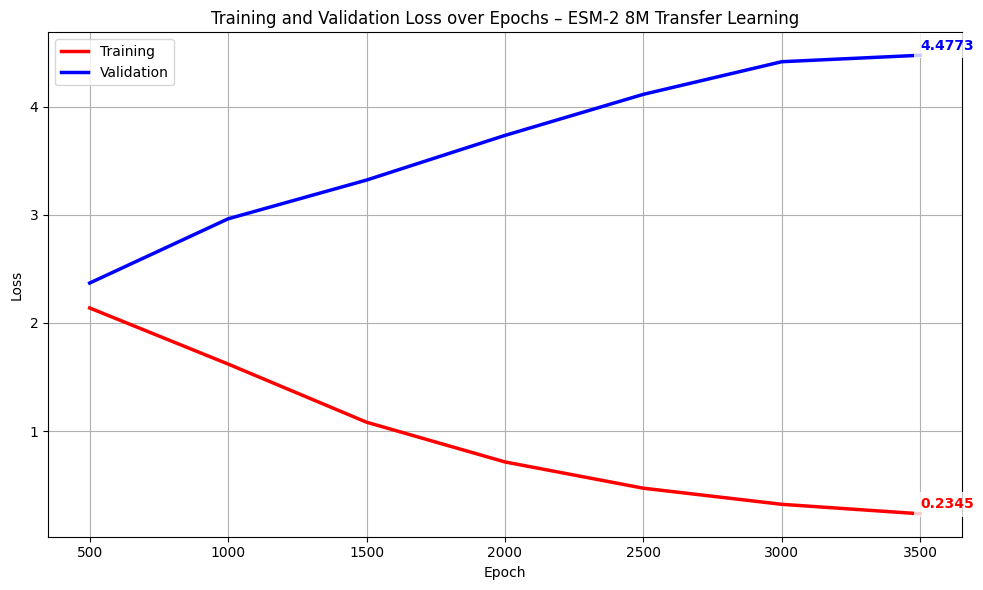

In [19]:
df = pd.read_csv("esm2_8M_transferLearning.csv")

# Extract only the necessary columns
df_clean = df.dropna(subset=["train/epoch",
                             "ESM-2 8M Transfer Learning - train/loss",
                             "ESM-2 8M Transfer Learning - eval/loss"])

# Rename for easier plotting
df_clean = df_clean.rename(columns={
    "train/epoch": "epoch",
    "ESM-2 8M Transfer Learning - train/loss": "train_loss",
    "ESM-2 8M Transfer Learning - eval/loss": "eval_loss"
})

# Extract values
epochs = df_clean["epoch"]
train_loss = df_clean["train_loss"]
eval_loss = df_clean["eval_loss"]

# Final loss values
last_epoch = epochs.iloc[-1]
last_train_loss = train_loss.iloc[-1]
last_eval_loss = eval_loss.iloc[-1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label="Training", color="red", linewidth=2.5)
plt.plot(epochs, eval_loss, label="Validation", color="blue", linewidth=2.5)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs – ESM-2 8M Transfer Learning")
plt.legend()
plt.grid(True)

# Annotate last values
plt.text(last_epoch - 1, last_train_loss + 0.05, f"{last_train_loss:.4f}",
         color="red", fontsize=10, weight="bold", bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))
plt.text(last_epoch - 1, last_eval_loss + 0.05, f"{last_eval_loss:.4f}",
         color="blue", fontsize=10, weight="bold", bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))

# Save and display
plt.tight_layout()
plt.savefig("esm2_8m_transferlearning_loss_plot_epochs.png")
plt.show()